# Lasso and Ridge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection   import RandomizedSearchCV
import joblib

In [2]:
# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [3]:
# Split features/target
X_train = train.drop('Score', axis=1)
y_train = train['Score']
X_test  = test.drop('Score', axis=1)
y_test  = test['Score']

In [4]:
preprocessor = joblib.load("preprocessor_unfitted.joblib")

## Lasso

In [5]:
# Build pipelines
lasso_pipe = Pipeline([
    ("prep", preprocessor),
    ("model", Lasso(max_iter=5000, random_state=42))
])

In [6]:
param_dist = {
    "model__alpha": np.logspace(-4, 1, 100)  
}


In [7]:
#  RandomizedSearchCV with 5-fold CV
n_iter_search = 50

lasso_search = RandomizedSearchCV(
    estimator=lasso_pipe,
    param_distributions=param_dist,
    n_iter=n_iter_search,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    random_state=42,
)

In [8]:
lasso_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['WhiteElo',
                                                                                'EloDif']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Opening_name',
 

In [9]:
print(f"Best params:", lasso_search.best_params_)
print(f"Lasso best CV MSE: {-lasso_search.best_score_:.4f}")
best_lasso = lasso_search.best_estimator_

Best params: {'model__alpha': 0.001291549665014884}
Lasso best CV MSE: 0.2269


In [10]:
# Final eval on test set
y_pred = best_lasso.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test R²:  {r2_score(y_test, y_pred):.4f}")

Test MSE: 0.2279
Test MAE: 0.4599
Test R²:  0.0321


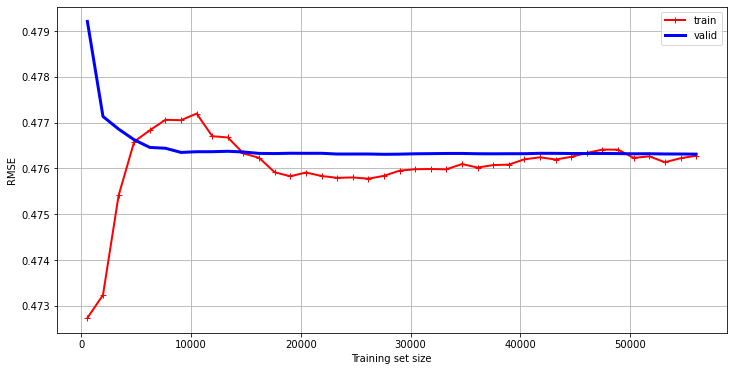

In [11]:
# Plot the learning curve for the lasso linear model
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(best_lasso,
                                                         X_train, y_train,
                                                         train_sizes = np.linspace(0.01, 1.0, 40),
                                                         cv = 5,
                                                         scoring = "neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

fig = plt.figure(figsize = (12, 6))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.show()

In [12]:
joblib.dump(best_lasso, "best_lasso.joblib")

['best_lasso.joblib']

## Ridge

In [13]:
# Build pipelines
ridge_pipe = Pipeline([
    ("prep", preprocessor),
    ("model", Ridge(random_state=42))
])

In [14]:
param_dist = {
    "model__alpha": np.logspace(-4, 1, 100)  
}


In [15]:
#  RandomizedSearchCV with 5-fold CV
n_iter_search = 50

ridge_search = RandomizedSearchCV(
    estimator=ridge_pipe,
    param_distributions=param_dist,
    n_iter=n_iter_search,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    random_state=42,
)

In [16]:
ridge_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['WhiteElo',
                                                                                'EloDif']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Opening_name',
 

In [17]:
print(f"Best params:", ridge_search.best_params_)
print(f"Lasso best CV MSE: {-ridge_search.best_score_:.4f}")
best_ridge = ridge_search.best_estimator_

Best params: {'model__alpha': 7.054802310718645}
Lasso best CV MSE: 0.2269


In [18]:
# Final eval on test set
y_pred = best_ridge.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test R²:  {r2_score(y_test, y_pred):.4f}")

Test MSE: 0.2279
Test MAE: 0.4597
Test R²:  0.0320


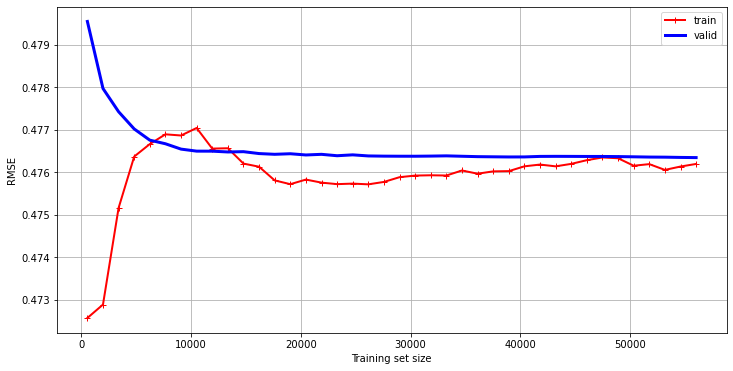

In [19]:
# Plot the learning curve for the Ridge linear model
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(best_ridge,
                                                         X_train, y_train,
                                                         train_sizes = np.linspace(0.01, 1.0, 40),
                                                         cv = 5,
                                                         scoring = "neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

fig = plt.figure(figsize = (12, 6))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.show()

In [20]:
joblib.dump(best_ridge, "best_ridge.joblib")

['best_ridge.joblib']